In [2]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [28]:
df = web.DataReader("MGLU3.SA", data_source='yahoo',
                                        start='2021-01-01', end='2021-01-31')

df.reset_index(inplace=True)

print(df.tail())

         Date       High        Low       Open      Close    Volume  Adj Close
14 2021-01-22  26.299999  25.100000  25.129999  25.990000  43004200  25.971165
15 2021-01-26  27.070000  25.670000  26.250000  25.750000  44474300  25.731340
16 2021-01-27  26.389999  25.350000  25.719999  25.790001  44942000  25.771311
17 2021-01-28  26.500000  25.389999  25.870001  26.190001  32819900  26.171021
18 2021-01-29  26.080000  25.030001  25.740000  25.270000  36141300  25.251688


In [ ]:

final_data = df

#  Plotting date vs the close market stock price
final_data.plot('Date','Close',color="red")
 
# Extract only top 60 rows to make the plot a little clearer
new_data = final_data.head(60)
 
#  Plotting date vs the close  market stock price
new_data.plot('Date','Close',color="green")
 
plt.show()

In [6]:
# 1. Filter out the closing market price data
close_data = final_data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))


In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

113/113 [==============================] - 4s 19ms/step - loss: 0.0043


In [25]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
print(test_data)
x_test = []
y_test =  dataset[training_data_len : , : ]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 

# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#print(predictions[:10])


[[0.74780487]
 [0.75756101]
 [0.74292681]
 [0.72390245]
 [0.77609755]
 [0.76341462]
 [0.77024395]
 [0.77707319]
 [0.75170731]
 [0.72926833]
 [0.77560974]
 [0.7629268 ]
 [0.74780487]
 [0.79365856]
 [0.78926831]
 [0.79804881]
 [0.81707317]
 [0.83853661]
 [0.87707315]
 [0.88585365]
 [0.84780493]
 [0.86000005]
 [0.85951224]
 [0.85414635]
 [0.82243905]
 [0.79512201]
 [0.76634151]
 [0.77024395]
 [0.77951217]
 [0.72487808]
 [0.72634143]
 [0.71658539]
 [0.6936585 ]
 [0.71804875]
 [0.72878051]
 [0.7195122 ]
 [0.71512194]
 [0.74      ]
 [0.74292681]
 [0.70878052]
 [0.66731709]
 [0.6619512 ]
 [0.63902441]
 [0.64439029]
 [0.64000004]
 [0.60439021]
 [0.65853659]
 [0.67365851]
 [0.63707314]
 [0.64829273]
 [0.64097558]
 [0.6097561 ]
 [0.63121954]
 [0.59853661]
 [0.64195121]
 [0.67024389]
 [0.63658542]
 [0.63951222]
 [0.55804881]
 [0.57073174]
 [0.55073175]
 [0.53073176]
 [0.51853664]
 [0.52829268]
 [0.5029268 ]
 [0.51951218]
 [0.51707319]
 [0.49414635]
 [0.48243904]
 [0.45219514]
 [0.41170734]
 [0.39

In [11]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

3.497566954288606


          Date       High        Low       Open      Close       Volume  \
173 2021-09-14  17.780001  16.850000  17.540001  17.030001   49175200.0   
174 2021-09-15  17.129999  16.490000  17.080000  16.620001   30868200.0   
175 2021-09-16  16.620001  16.110001  16.450001  16.370001   31384100.0   
176 2021-09-17  16.770000  15.860000  16.309999  16.570000   44037800.0   
177 2021-09-20  16.410000  15.790000  16.240000  16.049999   26978100.0   
..         ...        ...        ...        ...        ...          ...   
242 2021-12-23   6.340000   5.990000   6.220000   6.200000   97106100.0   
243 2021-12-27   6.780000   6.230000   6.230000   6.780000  124279800.0   
244 2021-12-28   6.960000   6.640000   6.790000   6.830000  165573900.0   
245 2021-12-29   6.900000   6.700000   6.840000   6.760000   79247400.0   
246 2021-12-30   7.410000   6.770000   6.800000   7.220000  180329400.0   

     Adj Close  
173  17.030001  
174  16.620001  
175  16.370001  
176  16.570000  
177  16.049999

<ipython-input-20-c46de6a358f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


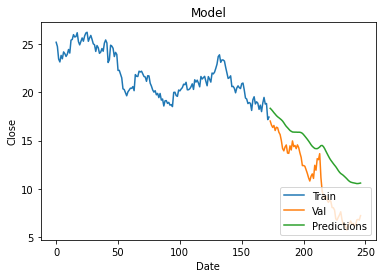

In [20]:
train = df[:training_data_len]
valid = df[training_data_len:]

print(valid)

 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()